<a href="https://colab.research.google.com/github/Rohith-s9401/task_1/blob/master/BITS_Mesra_Data_science_hacakthon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('train_dataset.csv')

In [ ]:
test_df = pd.read_csv('test_dataset.csv')

In [ ]:
print(df.shape)
print(test_df.shape)

(6800, 20)
(3200, 19)


In [ ]:
df.isnull().sum()

ID                  0
N_Days              0
Status              0
Drug             2025
Age                 0
Sex                 0
Ascites          2246
Hepatomegaly     2427
Spiders          2590
Edema               0
Bilirubin           0
Cholesterol      3101
Albumin             0
Copper           2156
Alk_Phos         2498
SGOT             2102
Tryglicerides    2812
Platelets         338
Prothrombin       155
Stage               0
dtype: int64

In [ ]:
df.drop('ID',axis =1,inplace=True)

In [ ]:
test_df.drop('ID',axis =1,inplace=True)

In [ ]:
df.shape

(6800, 19)

In [ ]:
test_df.shape

(3200, 18)

In [ ]:
df.isnull().sum()

N_Days              0
Status              0
Drug             2025
Age                 0
Sex                 0
Ascites          2246
Hepatomegaly     2427
Spiders          2590
Edema               0
Bilirubin           0
Cholesterol      3101
Albumin             0
Copper           2156
Alk_Phos         2498
SGOT             2102
Tryglicerides    2812
Platelets         338
Prothrombin       155
Stage               0
dtype: int64

In [ ]:
df['Age'] = df['Age']//365
test_df['Age'] = test_df['Age']//365

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

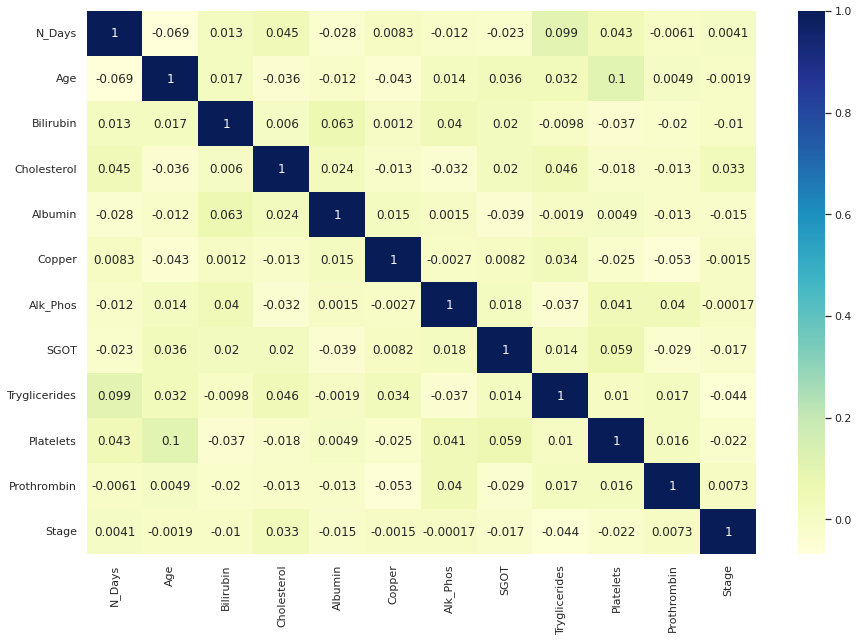

In [ ]:
df_corr = df.corr()
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(df_corr,cmap="YlGnBu",annot=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Edema'] = le.fit_transform(df['Edema'])
df['Status'] = le.fit_transform(df['Status'])
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1654,1,D-penicillamine,53,0,N,N,Y,0,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,41,0,D-penicillamine,62,0,NaN,N,NaN,0,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,297,2,NaN,76,0,N,N,NaN,0,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,1872,0,D-penicillamine,57,0,NaN,Y,Y,0,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,939,1,D-penicillamine,49,0,NaN,NaN,NaN,0,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


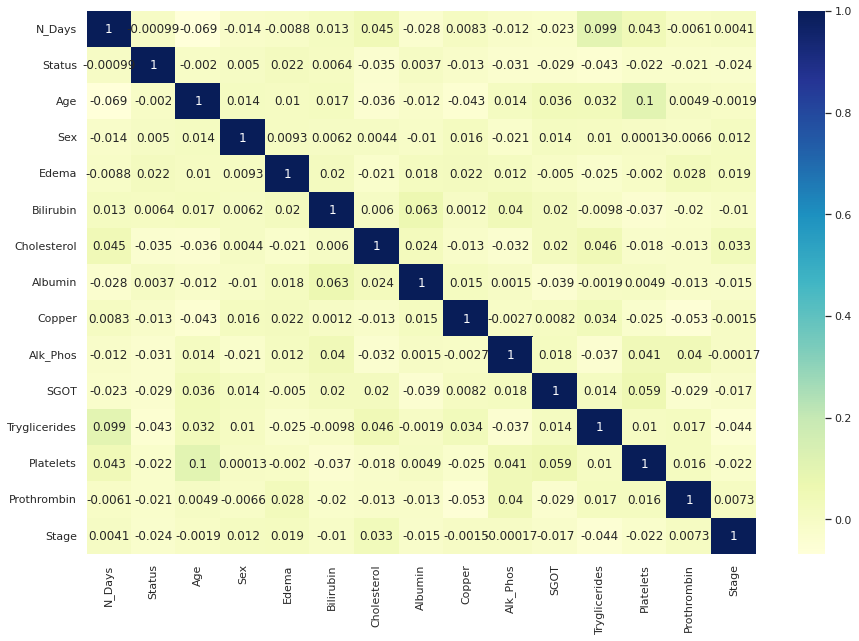

In [ ]:
df_corr = df.corr()
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(df_corr,cmap="YlGnBu",annot=True)

In [ ]:
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())
df['Copper'] = df['Copper'] .fillna(df['Copper'] .median())
df['Alk_Phos'] = df['Alk_Phos'].fillna(df['Alk_Phos'].median())
df['SGOT'] = df['SGOT'].fillna(df['SGOT'].median())
df['Tryglicerides'] = df['Tryglicerides'].fillna(df['Tryglicerides'].median())
df['Platelets'] = df['Platelets'].fillna(df['Platelets'].mean())
df['Prothrombin'] = df['Prothrombin'].fillna(df['Prothrombin'].median())

In [ ]:
df.isnull().sum()

N_Days              0
Status              0
Drug             2025
Age                 0
Sex                 0
Ascites          2246
Hepatomegaly     2427
Spiders          2590
Edema               0
Bilirubin           0
Cholesterol         0
Albumin             0
Copper              0
Alk_Phos            0
SGOT                0
Tryglicerides       0
Platelets           0
Prothrombin         0
Stage               0
dtype: int64

In [ ]:
df.drop(['Drug','Ascites','Hepatomegaly','Spiders'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_validation_std=sc.transform(X_validation)

In [ ]:
df['Stage'].value_counts()

4.0    3506
2.0    1507
3.0    1322
1.0     465
Name: Stage, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X= df.drop('Stage',axis=1)
y=df['Stage']
smote = SMOTE(sampling_strategy='minority')
X_s,y_s = smote.fit_resample(X,y)

In [ ]:
X_si,y_si = smote.fit_resample(X_s,y_s)

In [ ]:
X_six,y_six = smote.fit_resample(X_si,y_si)

In [ ]:
y_six.value_counts()

4.0    3506
1.0    3506
3.0    3506
2.0    3506
Name: Stage, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_six,y_six,test_size=0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf =  KNeighborsClassifier(n_neighbors=1)

In [ ]:
clf.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
from sklearn.metrics import f1_score
y2_GNB_model = clf.predict(X_test_std)
print("GaussianNB Accuracy :", f1_score(y_test, y2_GNB_model,average=None))

GaussianNB Accuracy : [0.80412371 0.6539924  0.66666667 0.42195122]


In [ ]:
test_df['Sex'] = le.fit_transform(test_df['Sex'])
test_df['Edema'] = le.fit_transform(test_df['Edema'])
test_df['Status'] = le.fit_transform(test_df['Status'])
test_df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,41,0,Placebo,61,0,N,NaN,N,0,1.4,247.0,3.62,NaN,NaN,108.65,NaN,169.0,11.6
1,1811,0,D-penicillamine,44,0,N,Y,N,0,0.3,311.0,2.80,92.0,1748.1,NaN,129.0,321.0,11.5
2,954,0,D-penicillamine,74,0,N,N,N,0,0.4,NaN,3.56,NaN,NaN,43.52,NaN,296.0,10.3
3,1969,2,Placebo,46,0,N,Y,N,0,1.2,NaN,3.16,NaN,617.1,113.76,NaN,125.0,10.9
4,2721,2,D-penicillamine,48,0,NaN,NaN,NaN,0,3.2,NaN,2.36,89.0,1782.4,NaN,129.0,138.0,10.6


In [ ]:
test_df['Cholesterol'] = test_df['Cholesterol'].fillna(test_df['Cholesterol'].median())
test_df['Copper'] = test_df['Copper'] .fillna(test_df['Copper'] .median())
test_df['Alk_Phos'] = test_df['Alk_Phos'].fillna(test_df['Alk_Phos'].median())
test_df['SGOT'] = test_df['SGOT'].fillna(test_df['SGOT'].median())
test_df['Tryglicerides'] = test_df['Tryglicerides'].fillna(test_df['Tryglicerides'].median())
test_df['Platelets'] = test_df['Platelets'].fillna(test_df['Platelets'].mean())
test_df['Prothrombin'] = test_df['Prothrombin'].fillna(test_df['Prothrombin'].median())

In [ ]:
test_df.isnull().sum()

N_Days              0
Status              0
Drug              963
Age                 0
Sex                 0
Ascites          1087
Hepatomegaly     1102
Spiders          1200
Edema               0
Bilirubin           0
Cholesterol         0
Albumin             0
Copper              0
Alk_Phos            0
SGOT                0
Tryglicerides       0
Platelets           0
Prothrombin         0
dtype: int64

In [ ]:
test_df.drop(['Drug','Ascites','Hepatomegaly','Spiders'], axis=1, inplace=True)

In [ ]:
test_df_std=sc.fit_transform(test_df)

In [ ]:
test_pred = clf.predict(test_df_std)
output = pd.DataFrame({'Stage':test_pred})
output.to_csv('submission.csv', index=False)